In [1]:
# Imports
import tensorflow as tf
import IPython.display as display
import random


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
#Return "Normal" Image
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [3]:
#Select content image
content_path = tf.keras.utils.get_file('randomimage.jpg', 'https://cdn-static.findly.com/wp-content/uploads/sites/1185/2020/03/Amy-Finer.png')
#Generate List of style images to pull from
style_list = []
style_list.append(tf.keras.utils.get_file('nora2.jpg','https://i.redd.it/d0ln5mlzjml11.jpg'))
style_list.append(tf.keras.utils.get_file('mona_style.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/1200px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg'))
style_list.append(tf.keras.utils.get_file('gow_style.jpg','https://i.pinimg.com/originals/7a/86/da/7a86dacc8d09488daa8d120cb6859f21.jpg'))
style_list.append(tf.keras.utils.get_file('monet2.jpg','https://i.etsystatic.com/12575844/r/il/28a5d7/1029569652/il_570xN.1029569652_bmlp.jpg'))
style_list.append(tf.keras.utils.get_file('yt_style2.jpg','https://arthive.com/res/media/img/oy1000/work/9f2/190691@2x.jpg'))
style_list.append(tf.keras.utils.get_file('thestarrynight.jpg','https://media.timeout.com/images/103166739/750/422/image.jpg'))
style_list.append(tf.keras.utils.get_file('sandroboticelli.jpg','https://media.timeout.com/images/103166737/750/422/image.jpg'))
style_list.append(tf.keras.utils.get_file('arrangementingrayandblack2.jpg','https://upload.wikimedia.org/wikipedia/commons/1/1b/Whistlers_Mother_high_res.jpg'))
style_list.append(tf.keras.utils.get_file('gustavklimpt_thekiss2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/The_Kiss_-_Gustav_Klimt_-_Google_Cultural_Institute.jpg/1024px-The_Kiss_-_Gustav_Klimt_-_Google_Cultural_Institute.jpg'))
style_list.append(tf.keras.utils.get_file('JanEyck_Arnolfiniportrait2.jpg','https://upload.wikimedia.org/wikipedia/commons/3/33/Van_Eyck_-_Arnolfini_Portrait.jpg'))
style_list.append(tf.keras.utils.get_file('GardenofEarthlyDelights2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/The_Garden_of_earthly_delights.jpg/1920px-The_Garden_of_earthly_delights.jpg'))
style_list.append(tf.keras.utils.get_file('IslandOfLaGrandeJatte2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/A_Sunday_on_La_Grande_Jatte%2C_Georges_Seurat%2C_1884.jpg/1280px-A_Sunday_on_La_Grande_Jatte%2C_Georges_Seurat%2C_1884.jpg'))
style_list.append(tf.keras.utils.get_file('PabloPicasso2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Les_Grandes_Baigneuses%2C_par_Paul_C%C3%A9zanne%2C_Yorck.jpg/1024px-Les_Grandes_Baigneuses%2C_par_Paul_C%C3%A9zanne%2C_Yorck.jpg'))
style_list.append(tf.keras.utils.get_file('PeterBruegel_TheHarvesters2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Pieter_Bruegel_the_Elder-_The_Harvesters_-_Google_Art_Project.jpg/1280px-Pieter_Bruegel_the_Elder-_The_Harvesters_-_Google_Art_Project.jpg'))
style_list.append(tf.keras.utils.get_file('LeDéjeunersurl’herbe2.jpg','https://upload.wikimedia.org/wikipedia/commons/9/90/Edouard_Manet_-_Luncheon_on_the_Grass_-_Google_Art_Project.jpg'))
style_list.append(tf.keras.utils.get_file('LaRendicionDeBrado.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Vel%C3%A1zquez_-_de_Breda_o_Las_Lanzas_%28Museo_del_Prado%2C_1634-35%29.jpg/1280px-Vel%C3%A1zquez_-_de_Breda_o_Las_Lanzas_%28Museo_del_Prado%2C_1634-35%29.jpg'))
style_list.append(tf.keras.utils.get_file('TheNakedMaja2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Goya_Maja_naga2.jpg/1920px-Goya_Maja_naga2.jpg'))
style_list.append(tf.keras.utils.get_file('Guernica2.jpg','https://upload.wikimedia.org/wikipedia/en/7/74/PicassoGuernica.jpg'))
style_list.append(tf.keras.utils.get_file('GrandeOdalisque2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Jean_Auguste_Dominique_Ingres%2C_La_Grande_Odalisque%2C_1814.jpg/1920px-Jean_Auguste_Dominique_Ingres%2C_La_Grande_Odalisque%2C_1814.jpg'))
style_list.append(tf.keras.utils.get_file('LibertyLeadingthePeople2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Eug%C3%A8ne_Delacroix_-_Le_28_Juillet._La_Libert%C3%A9_guidant_le_peuple.jpg/747px-Eug%C3%A8ne_Delacroix_-_Le_28_Juillet._La_Libert%C3%A9_guidant_le_peuple.jpg'))
style_list.append(tf.keras.utils.get_file('Impression,Sunrise.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Monet_-_Impression%2C_Sunrise.jpg/400px-Monet_-_Impression%2C_Sunrise.jpg'))
style_list.append(tf.keras.utils.get_file('WandererabovetheSeaofFog2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Caspar_David_Friedrich_-_Wanderer_above_the_sea_of_fog.jpg/300px-Caspar_David_Friedrich_-_Wanderer_above_the_sea_of_fog.jpg'))
style_list.append(tf.keras.utils.get_file('TheRaftoftheMedusa2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/JEAN_LOUIS_TH%C3%89ODORE_G%C3%89RICAULT_-_La_Balsa_de_la_Medusa_%28Museo_del_Louvre%2C_1818-19%29.jpg/1280px-JEAN_LOUIS_TH%C3%89ODORE_G%C3%89RICAULT_-_La_Balsa_de_la_Medusa_%28Museo_del_Louvre%2C_1818-19%29.jpg'))
style_list.append(tf.keras.utils.get_file('Nighthawks2.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Nighthawks_by_Edward_Hopper_1942.jpg/1920px-Nighthawks_by_Edward_Hopper_1942.jpg'))
style_list.append(tf.keras.utils.get_file('NudeDescendingaStaircase2.jpg','https://upload.wikimedia.org/wikipedia/en/thumb/c/c0/Duchamp_-_Nude_Descending_a_Staircase.jpg/800px-Duchamp_-_Nude_Descending_a_Staircase.jpg'))
style_list.append(tf.keras.utils.get_file('GreatWaveKanagawa.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1280px-Tsunami_by_hokusai_19th_century.jpg'))
style_list.append(tf.keras.utils.get_file('Compo7.jpg','https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg'))
style_list.append(tf.keras.utils.get_file('PillarsOfCreation.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg/1024px-Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg'))

#style_list.append(tf.keras.utils.get_file('name.jpg','link'))

In [4]:
#Adjust image size
def load_img(path_to_img):
    max_dim = 1024
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [5]:
#Display image
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

c:\users\amada\pycharmprojects\tflearning\venv\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


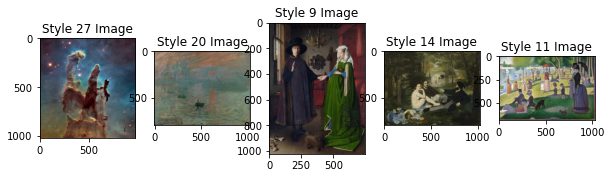

In [6]:
#STYLE
content_image = load_img(content_path)


style_image = []


#Target a specific previous setting, commented out until needed
'''ind_image = [28]
for a in ind_image:
    style_image.append(load_img(style_list[a]))'''

    
#Randomly select 5 style images
ind_image = []
im_count = 5
for a in range(im_count):
    rand_ind = random.randint(0,len(style_list)-1)
    while (any(rand == rand_ind for rand in ind_image) and len(ind_image) > 0):
        rand_ind = random.randint(0,len(style_list)-1)
    style_image.append(load_img(style_list[rand_ind]))
    ind_image.append(rand_ind)
    
#Display the content image and the 5 selected style images
plt.subplot(1, 6, 1)
imshow(content_image, 'Content Image')
i = 0
for a in style_image:
    #print(i)
    plt.subplot(1, len(style_image)+1, i+1)
    imshow(a, ('Style '+ str(ind_image[i]) + ' Image'))
    i+=1

In [7]:
#Load a VGG19 and test run it on our image to ensure it's used correctly
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)

In [8]:
#Default layer selection
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1',
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [9]:
#This following function builds a VGG19 model that returns a list of intermediate layer outputs
def vgg_layers(layer_names):
  # Creates a vgg model that returns a list of intermediate output values
  # Load our model. Load pretrained VGG, trained on imagenet data
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
  
    outputs = [vgg.get_layer(name).output for name in layer_names]

    model = tf.keras.Model([vgg.input], outputs)
    return model

In [10]:
#STYLE CHANGE
#Extract style information from the selected style images and their respected style layer selections
style_extractor = vgg_layers(style_layers)
for a in style_image:
    style_extractor(a*255)
    

In [11]:
#Style calculator
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

In [12]:
#Returns the gram matrix (style) of the style_layers and content of the content_layers
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg =  vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        "Expects float input in [0,1]"
        inputs = inputs*255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

        style_outputs = [gram_matrix(style_output)
                         for style_output in style_outputs]

        content_dict = {content_name:value 
                        for content_name, value 
                        in zip(self.content_layers, content_outputs)}

        style_dict = {style_name:value
                      for style_name, value
                      in zip(self.style_layers, style_outputs)}
    
        return {'content':content_dict, 'style':style_dict}

In [13]:
extractor = StyleContentModel(style_layers, content_layers)
results = extractor(tf.constant(content_image))

In [14]:
#STYLE CHANGE
#Setup target values
style_targets = []
for a in style_image:
    style_targets.append(extractor(a)['style'])
content_targets = extractor(content_image)['content']

In [15]:
#Initialize output image with the content_image
image = tf.Variable(content_image)

In [16]:
#Keep the pixel values between 0 and 1
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [17]:
#Optimization protocol
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

#Randomly make style weights positive or negative, distrubtion is not evenly split or evenly weighted
def pos_or_neg():
    if np.random.rand() < 0.70:
        return 1
    else:
        return -0.25

In [18]:
#STYLE CHANGE
#Random
style_weight = []
for j in range(len(style_image)):
    style_weight.append((1e-2+0.1*np.random.rand())*(pos_or_neg()))

content_weight=6e4
   
#Target a specific previous setting, commented out until needed
'''style_weight = [0.05518, -0.01606, -0.01859, -0.01037, -0.00296]'''

#Print the style weight settings and the selected style image number for later use
scientific_notation = "{:e}".format(12300000)
i=0
style_settings = ""
sum_weight = 0
for a in style_weight:
    sum_weight += a
    style_settings = style_settings + "S"+str(ind_image[i])+"= " + str(round(a,5)) + " "
    i += 1
    
style_settings = style_settings + "C= " + str(round(content_weight, 5))

print(style_settings)
print("Sum Weight=", sum_weight)

image = tf.Variable(content_image)

S27= 0.02556 S20= 0.08378 S9= -0.0157 S14= -0.01526 S11= 0.04825 C= 60000.0
Sum Weight= 0.1266289099645659


In [19]:
#STYLE(adjust this block)
#Core loss function
def style_content_loss(outputs):
    
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = []
    for j in range(len(style_image)):
        style_loss.append(tf.add_n([tf.reduce_mean(((style_outputs)[name]-(style_targets[j])[name])**2) 
                           for name in style_outputs.keys()]))
    
    for j in range(len(style_image)):
        style_loss[j] = style_loss[j]*style_weight[j]/num_style_layers
    
    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    
    content_loss *= content_weight / num_content_layers
    loss = content_loss

    for a in style_loss:
        loss +=  a  
    
    return loss

In [20]:
#High frequency regularization
def high_pass_x_y(image):
    x_var = image[:,:,1:,:] - image[:,:,:-1,:]
    y_var = image[:,1:,:,:] - image[:,:-1,:,:]
    return x_var, y_var

x_deltas, y_deltas = high_pass_x_y(content_image)
x_deltas, y_deltas = high_pass_x_y(image)

def total_variation_loss(image):
    x_deltas, y_deltas = high_pass_x_y(image)
    return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))
total_variation_weight=30

In [21]:
@tf.function()
#Core train function
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = style_content_loss(outputs)
        loss += total_variation_weight*tf.image.total_variation(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

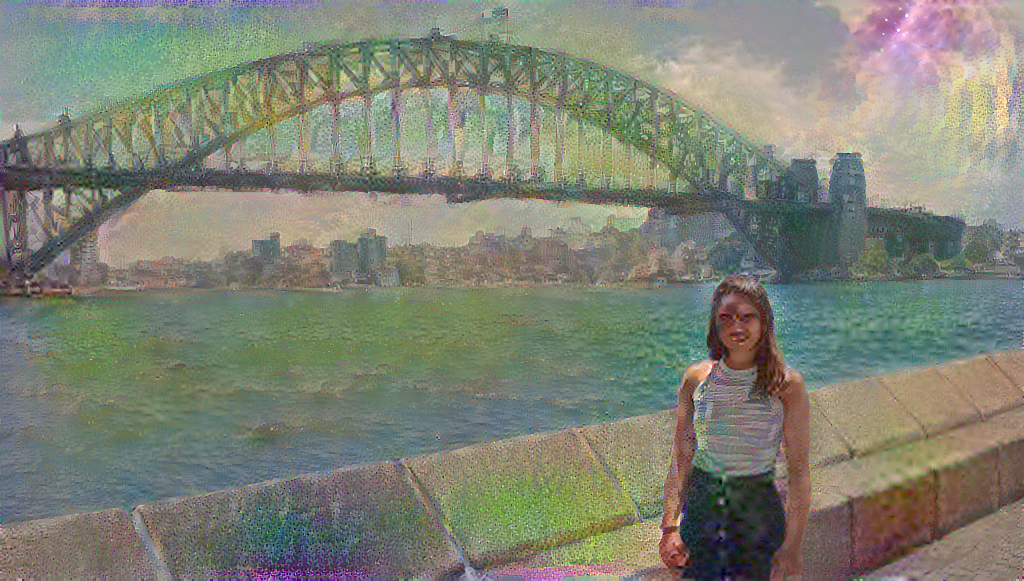

Train step: 1000
Total time: 1729.0


In [23]:
#Begin training on the data
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
        print(".", end='')
    display.clear_output(wait=True)
    display.display(tensor_to_image(image))
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))